# Predicting asthma attacks in NYC
I will be using the data from https://www.kaggle.com/new-york-city/ny-ems-incident-dispatch-data
in conjunction with air quality data acquired from https://www.epa.gov/outdoor-air-quality-data/download-daily-data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [16,9]

In [3]:
asthma_related = pd.read_csv('./asthma-data.csv', parse_dates=['INCIDENT_DATETIME'])
asthma_related.shape

(120607, 32)

In [4]:
asthma_related.sample(10)

,Unnamed: 0,CAD_INCIDENT_ID,INCIDENT_DATETIME,INITIAL_CALL_TYPE,INITIAL_SEVERITY_LEVEL_CODE,FINAL_CALL_TYPE,FINAL_SEVERITY_LEVEL_CODE,FIRST_ASSIGNMENT_DATETIME,VALID_DISPATCH_RSPNS_TIME_INDC,DISPATCH_RESPONSE_SECONDS_QY,...,ZIPCODE,POLICEPRECINCT,CITYCOUNCILDISTRICT,COMMUNITYDISTRICT,COMMUNITYSCHOOLDISTRICT,CONGRESSIONALDISTRICT,REOPEN_INDICATOR,SPECIAL_EVENT_INDICATOR,STANDBY_INDICATOR,TRANSFER_INDICATOR
99424,7397407,133213121,2013-11-17 20:36:47,ASTHMB,2,ASTHMB,2,2013-11-17T20:37:09.000,Y,22,...,11237.0,83.0,34.0,304.0,32.0,7.0,N,N,N,N
24060,2445236,171414403,2017-05-21 23:54:37,ASTHMB,2,ASTHMB,2,2017-05-21T23:54:43.000,Y,6,...,11375.0,112.0,29.0,406.0,28.0,6.0,N,N,N,N
111467,8102126,131301317,2013-05-10 10:28:32,ASTHMB,2,ASTHMB,2,2013-05-10T10:29:09.000,Y,37,...,10454.0,40.0,8.0,201.0,7.0,15.0,N,N,N,N
26976,2708928,170760924,2017-03-17 07:58:28,ASTHMB,3,CARD,3,2017-03-17T07:59:07.000,Y,39,...,11216.0,79.0,36.0,303.0,13.0,8.0,N,N,N,N
35639,3358241,162773934,2016-10-03 22:00:23,ASTHMB,2,ASTHMB,2,2016-10-03T22:00:45.000,Y,22,...,11434.0,113.0,28.0,412.0,28.0,5.0,N,N,N,N
50805,4492369,153530706,2015-12-19 04:50:57,ASTHMB,2,ASTHMB,2,2015-12-19T04:51:24.000,Y,27,...,10472.0,43.0,18.0,209.0,12.0,15.0,N,N,N,N
12308,1304924,180543974,2018-02-23 22:34:02,DIFFBR,2,ASTHMB,2,2018-02-23T22:34:37.000,Y,35,...,10455.0,41.0,17.0,202.0,8.0,15.0,N,N,N,N
5249,511765,182424053,2018-08-30 20:24:49,ASTHMB,2,ASTHMB,2,2018-08-30T20:24:58.000,Y,9,...,11208.0,75.0,42.0,305.0,19.0,8.0,N,N,N,N
57389,4934039,152392955,2015-08-27 17:41:15,ASTHMB,2,ASTHMB,2,2015-08-27T17:41:26.000,Y,11,...,10474.0,41.0,17.0,202.0,8.0,15.0,N,N,N,N
33646,3211490,163130348,2016-11-08 03:09:06,ASTHMB,2,ASTHMB,2,2016-11-08T03:09:55.000,Y,49,...,10453.0,46.0,14.0,205.0,10.0,15.0,N,N,N,N


In [5]:
asthma_related.shape

(120607, 32)

Now we need to merge in the air quality data

In [6]:
import glob
aq_files = glob.glob("./aqi-data-*.csv")
li = []

for filename in aq_files:
    df = pd.read_csv(filename, index_col='date')
    li.append(df)

aqi_data = pd.concat(li)
aqi_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2191 entries, 2014-01-01 to 2018-12-31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   OZONE   2150 non-null   float64
 1   PM2.5   2185 non-null   float64
 2   PM10    1126 non-null   float64
dtypes: float64(3)
memory usage: 68.5+ KB


In [7]:
# fill missing values with latest readings
aqi_data.fillna(method='ffill', inplace=True)

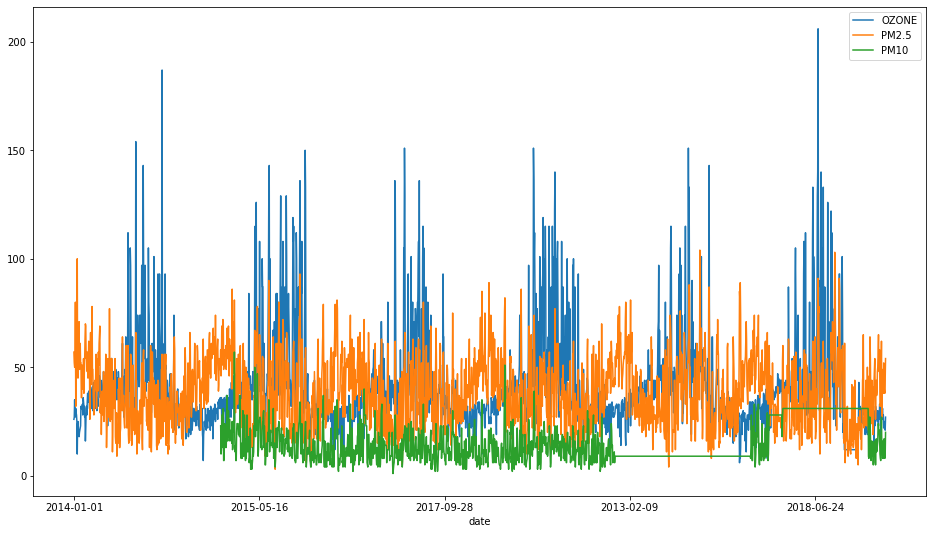

In [8]:
aqi_data.plot()

In [9]:
# adding some more useful columns
asthma_related['INCIDENT_DATETIME_DATE'] = asthma_related.INCIDENT_DATETIME.dt.strftime('%Y-%m-%d')
asthma_related['DAY_OF_WEEK'] = asthma_related.INCIDENT_DATETIME.dt.day_name()
asthma_related['MONTH'] = asthma_related.INCIDENT_DATETIME.dt.month_name()

In [10]:
dataset = asthma_related.groupby(['INCIDENT_DATETIME_DATE','DAY_OF_WEEK','MONTH']).agg({'CAD_INCIDENT_ID': ['count']})
dataset.reset_index(inplace=True)
dataset.columns = ['INCIDENT_DATETIME_DATE','DAY_OF_WEEK','MONTH','NUMBER_OF_INCIDENTS']
dataset

,INCIDENT_DATETIME_DATE,DAY_OF_WEEK,MONTH,NUMBER_OF_INCIDENTS
0,2013-01-01,Tuesday,January,102
1,2013-01-02,Wednesday,January,96
2,2013-01-03,Thursday,January,99
3,2013-01-04,Friday,January,93
4,2013-01-05,Saturday,January,79
...,...,...,...,...
2179,2018-12-27,Thursday,December,51
2180,2018-12-28,Friday,December,38
2181,2018-12-29,Saturday,December,27
2182,2018-12-30,Sunday,December,37


In [11]:
def set_shift(_s):
    aqi_data['ROLLING_MEAN_PM'] = aqi_data['PM2.5'].rolling(7).mean().shift(_s)
    # addind air quality columns to data frame
    asthma_aqi = dataset.merge(aqi_data, right_index=True, left_on='INCIDENT_DATETIME_DATE', how='inner')
    # filter out data with nulls in ROLLING_MEAN_PM
    asthma_aqi = asthma_aqi[~asthma_aqi.ROLLING_MEAN_PM.isna()]
    print((_s, asthma_aqi.NUMBER_OF_INCIDENTS.corr(asthma_aqi.ROLLING_MEAN_PM)))
    return asthma_aqi

# trying to find the right number of days to shift to get the best correlation
for s in range(1,35):
    set_shift(s)

# and the winner is 22
asthma_aqi = set_shift(22)

(1, 0.11302254614652212)
(2, 0.10135703302464398)
(3, 0.09283797892855265)
(4, 0.08811971072682526)
(5, 0.08935815137213679)
(6, 0.09070828035084778)
(7, 0.09580316659421506)
(8, 0.09571455184208653)
(9, 0.09453244019568817)
(10, 0.09488041864399942)
(11, 0.09570644653307989)
(12, 0.09321419972930116)
(13, 0.09133106144686004)
(14, 0.08739004187682832)
(15, 0.08491344785541485)
(16, 0.08910846968471911)
(17, 0.09686212805134636)
(18, 0.10461293897523292)
(19, 0.1121143320443497)
(20, 0.1230458598896075)
(21, 0.1309940091750236)
(22, 0.13701184878852232)
(23, 0.13349914452580566)
(24, 0.12501566389950364)
(25, 0.1188080245077209)
(26, 0.11526060672687796)
(27, 0.11424823444851623)
(28, 0.11112122473268697)
(29, 0.10968952544204244)
(30, 0.11045869753400843)
(31, 0.11252401715958944)
(32, 0.11796956969737893)
(33, 0.12219283963760384)
(34, 0.12139412141114785)
(22, 0.13701184878852232)


In [12]:
dataset = asthma_aqi.merge(pd.get_dummies(dataset['DAY_OF_WEEK']), right_index=True, left_index=True)
dataset = dataset.merge(pd.get_dummies(dataset['MONTH']), right_index=True, left_index=True)
dataset

,INCIDENT_DATETIME_DATE,DAY_OF_WEEK,MONTH,NUMBER_OF_INCIDENTS,OZONE,PM2.5,PM10,ROLLING_MEAN_PM,Friday,Monday,...,December,February,January,July,June,March,May,November,October,September
0,2013-01-01,Tuesday,January,102,32.0,55.0,9.0,41.142857,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2013-01-02,Wednesday,January,96,32.0,50.0,9.0,41.428571,0,0,...,0,0,1,0,0,0,0,0,0,0
2,2013-01-03,Thursday,January,99,32.0,55.0,9.0,43.000000,0,0,...,0,0,1,0,0,0,0,0,0,0
3,2013-01-04,Friday,January,93,33.0,58.0,9.0,44.428571,1,0,...,0,0,1,0,0,0,0,0,0,0
4,2013-01-05,Saturday,January,79,33.0,54.0,9.0,45.714286,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2179,2018-12-27,Thursday,December,51,25.0,51.0,17.0,41.142857,0,0,...,1,0,0,0,0,0,0,0,0,0
2180,2018-12-28,Friday,December,38,24.0,40.0,13.0,42.428571,1,0,...,1,0,0,0,0,0,0,0,0,0
2181,2018-12-29,Saturday,December,27,24.0,38.0,8.0,41.428571,0,0,...,1,0,0,0,0,0,0,0,0,0
2182,2018-12-30,Sunday,December,37,21.0,44.0,9.0,40.000000,0,0,...,1,0,0,0,0,0,0,0,0,0


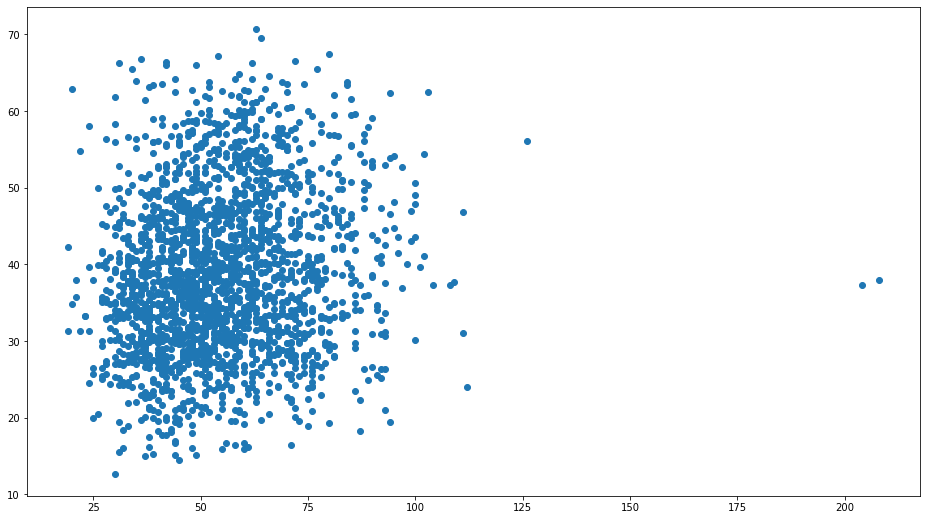

In [13]:
plt.scatter(x=dataset.NUMBER_OF_INCIDENTS, y=dataset.ROLLING_MEAN_PM)

### Trying a linear regression model with one feature

In [14]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score

feature_cols = ['ROLLING_MEAN_PM']
X = dataset[feature_cols]
y = dataset.NUMBER_OF_INCIDENTS

X_train, X_test, y_train, y_test = train_test_split(X, y)
lm = linear_model.LinearRegression()
cross_val_score(lm, X_train, y_train, scoring='r2', cv=5)

array([0.01723005, 0.03027873, 0.01668137, 0.01450744, 0.02409911])

In [15]:
import numpy as np
scores = cross_val_score(lm, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
np.mean(np.sqrt(-scores))

16.565747279554326

### Try with Random Forest Regression

In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

numeric_features = ['ROLLING_MEAN_PM']
numeric_transformer = Pipeline(steps=[('poly',PolynomialFeatures(degree = 2)),
                                      ('scaler', StandardScaler())])

categorical_features = ['DAY_OF_WEEK','MONTH']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

model = RandomForestRegressor()

X = dataset[numeric_features + categorical_features]
y = dataset.NUMBER_OF_INCIDENTS
X_train, X_test, y_train, y_test = train_test_split(X, y)
p = Pipeline([('preprocessor', preprocessor), ('model', model)])
g = GridSearchCV(p, param_grid={'model__max_depth': range(1,8), 'model__n_estimators': [100,200,500,1000]}, cv=3)

In [17]:
%%time
g.fit(X_train, y_train)
scores = cross_val_score(g, X, y, cv=10, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

CPU times: user 18min 25s, sys: 22 s, total: 18min 47s
Wall time: 20min 42s


16.672759989284

In [28]:
g.best_params_

{'model__max_depth': 5, 'model__n_estimators': 200}

## Feature selection

In [ ]:
from sklearn.feature_selection import RFECV
rfecv = RFECV(estimator=clf, step=1, cv=5,
              scoring='r2')
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

In [ ]:
rfecv.grid_scores_